<a href="https://colab.research.google.com/github/Bayusatriapersada/Game-Player-Analysis/blob/master/Game_Player_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
from fbprophet.plot import plot_yearly
import matplotlib.dates as mdates
from google.colab import files
%matplotlib inline


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Bayusatriapersada/Game-Player-Analysis/master/RainbowSix.csv',parse_dates=['DateTime'])
df2 = pd.read_csv('https://raw.githubusercontent.com/Bayusatriapersada/Game-Player-Analysis/master/Counter%20Strike%202017%202019.csv',parse_dates=['DateTime'])
df2

,DateTime,Players,Flag,TwitchStreamer
0,2017-01-22,789088,NaN,690828
1,2017-01-23,721632,NaN,686652
2,2017-01-24,707397,NaN,765904
3,2017-01-25,720396,NaN,710862
4,2017-01-26,676652,NaN,429314
...,...,...,...,...
1042,2019-11-30,759412,NaN,188446
1043,2019-12-01,722402,NaN,222841
1044,2019-12-02,591367,NaN,177613
1045,2019-12-03,598239,NaN,211951


In [0]:
df2 = df2[['DateTime','Players']].dropna()


In [0]:
df2['DateTime'] = pd.to_datetime(df['DateTime'])


In [0]:
df.rename(columns={'DateTime':'ds','Players':'y'},inplace = True)
df2.rename(columns={'DateTime':'ds','Players':'y'},inplace = True)

In [0]:
df2

,ds,y
0,2017-01-01,789088
1,2017-01-02,721632
2,2017-01-03,707397
3,2017-01-04,720396
4,2017-01-05,676652
...,...,...
1042,2019-11-09,759412
1043,2019-11-10,722402
1044,2019-11-11,591367
1045,2019-11-12,598239


In [0]:
df

,ds,y
0,2017-01-01,30547
1,2017-01-02,34504
2,2017-01-03,30129
3,2017-01-04,28738
4,2017-01-05,28180
...,...,...
1062,2019-11-29,108358
1063,2019-11-30,120470
1064,2019-12-01,114531
1065,2019-12-02,87946


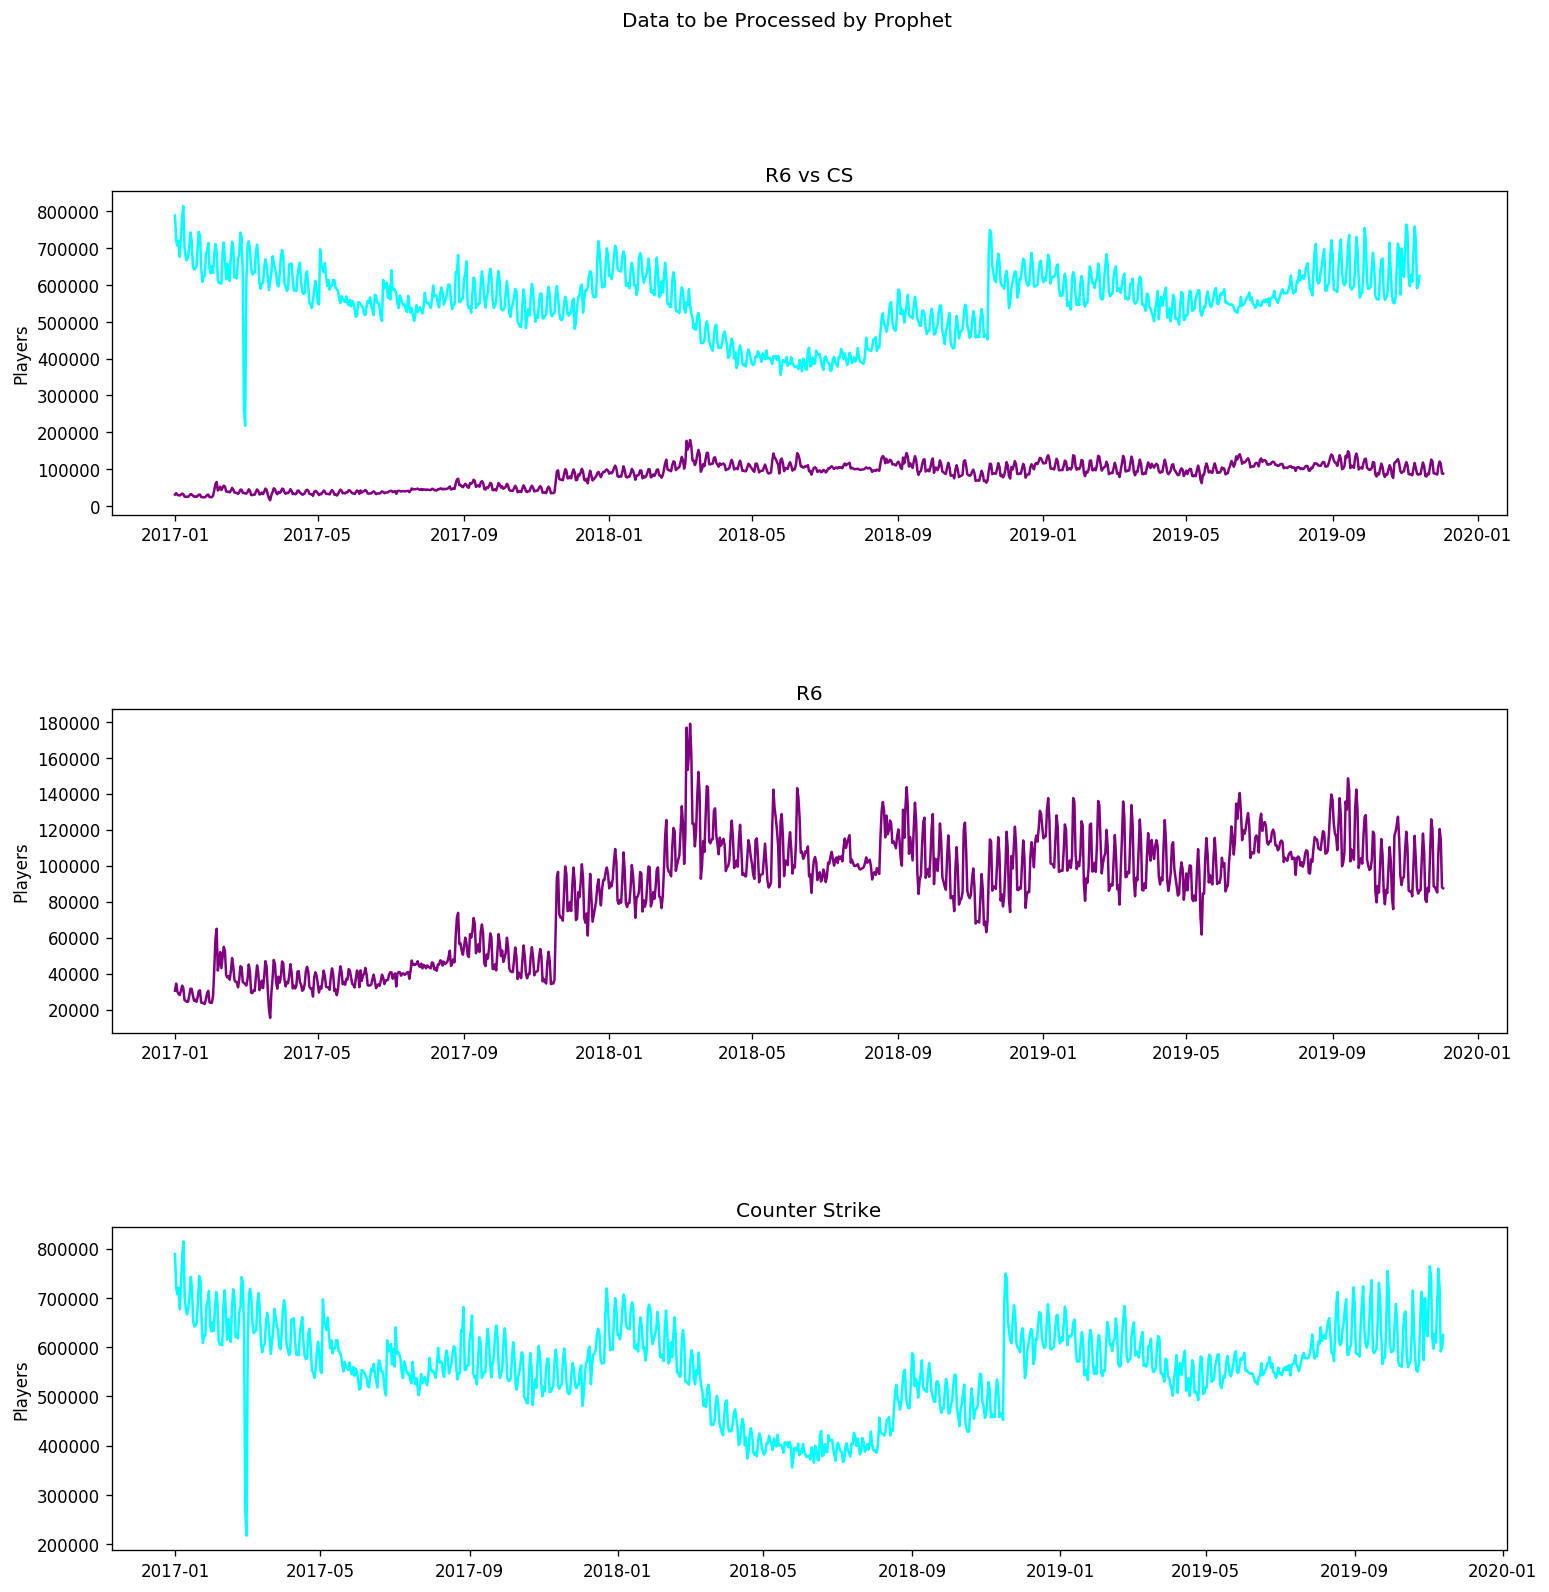

In [0]:
plt.rcParams.update({'figure.figsize':(15,15), 'figure.dpi':120})
fig,ax = plt.subplots(3)
fig.subplots_adjust(hspace=.6)
fig.suptitle("Data to be Processed by Prophet")
ax[0].plot(df['ds'],df['y'],color="Purple")
ax[0].plot(df2['ds'],df2['y'],color='Cyan')
ax[0].set_title('R6 vs CS')
ax[0].set_ylabel('Players')
ax[1].plot(df['ds'],df['y'],color="Purple")
ax[1].set_title('R6')
ax[1].set_ylabel('Players')
ax[2].plot(df2['ds'],df2['y'],color='cyan')
ax[2].set_ylabel('Players')
plt.title('Counter Strike')
plt.show()

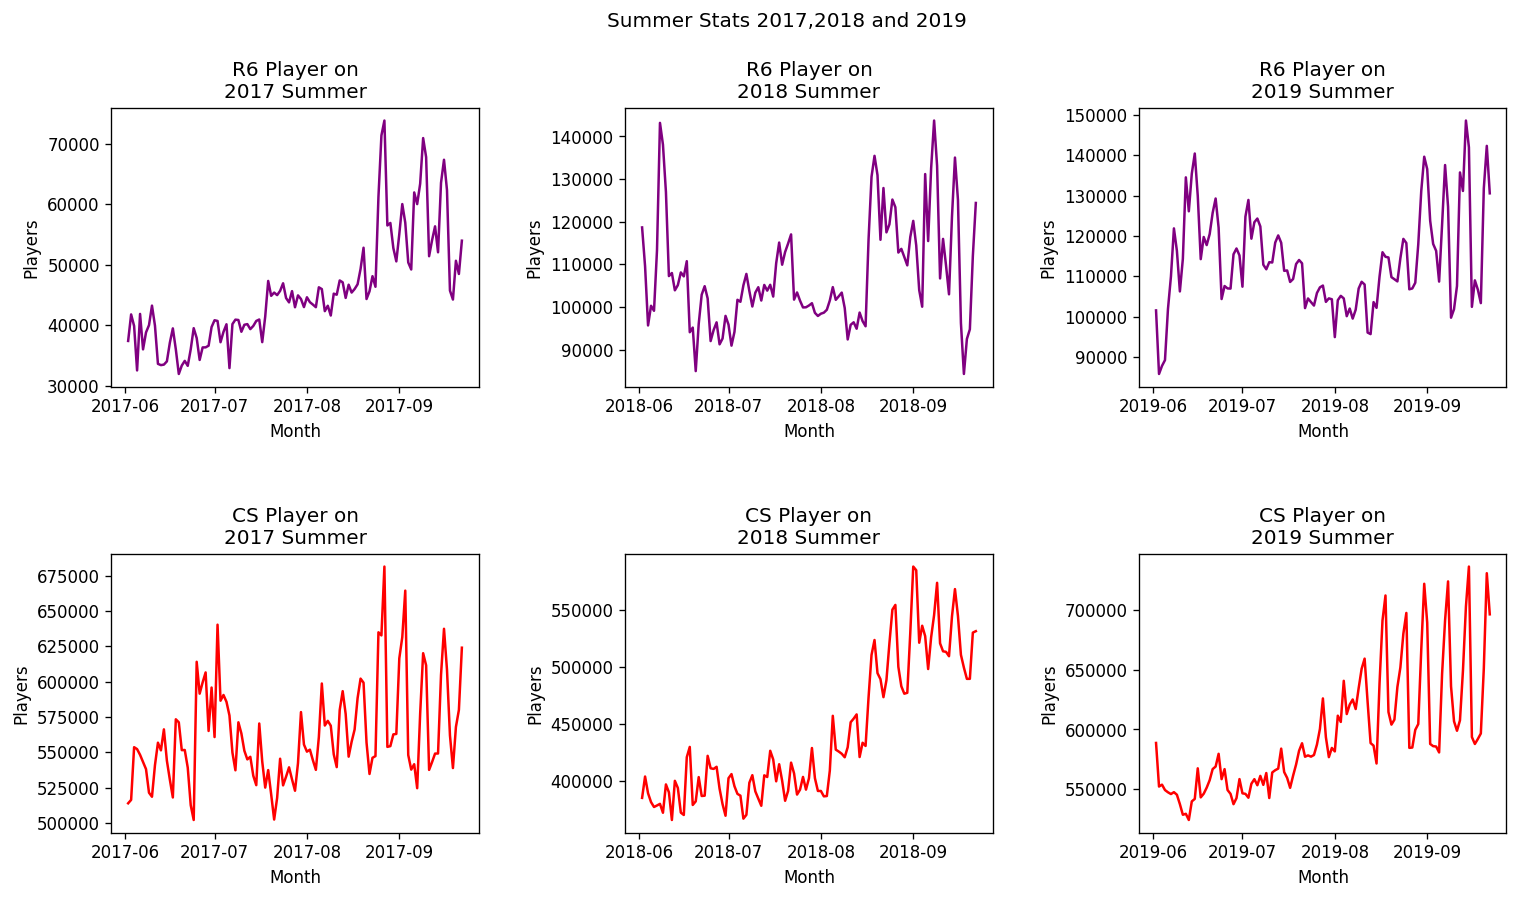

In [0]:
dfsetengahr6 = df[(df['ds'] > '2017-06-01') & (df['ds'] <= '2017-09-22')]
dfsetengahcs = df2[(df2['ds'] > '2017-06-01') & (df2['ds'] <= '2017-09-22')]
dfsetengahr62= df[(df['ds'] > '2018-06-01') & (df['ds'] <= '2018-09-22')]
dfsetengahcs2 = df2[(df2['ds'] > '2018-06-01') & (df2['ds'] <= '2018-09-22')]
dfsetengahr63= df[(df['ds'] > '2019-06-01') & (df['ds'] <= '2019-09-22')]
dfsetengahcs3 = df2[(df2['ds'] > '2019-06-01') & (df2['ds'] <= '2019-09-22')]
fig,((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,8))
fig.suptitle('Summer Stats 2017,2018 and 2019')
fig.subplots_adjust(hspace=.6,wspace= .4)
ax1.plot(dfsetengahr6['ds'],dfsetengahr6['y'],color='Purple')
ax1.set(ylabel= "Players",xlabel="Month",title="R6 Player on\n2017 Summer")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax4.plot(dfsetengahcs['ds'],dfsetengahcs['y'],color='Red')
ax4.set(ylabel= "Players",xlabel="Month",title="CS Player on\n2017 Summer")
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax2.plot(dfsetengahr62['ds'],dfsetengahr62['y'],color='Purple')
ax5.plot(dfsetengahcs2['ds'],dfsetengahcs2['y'],color='Red')
ax2.set(ylabel= "Players",xlabel="Month",title="R6 Player on\n2018 Summer")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax5.set(ylabel= "Players",xlabel="Month",title="CS Player on\n2018 Summer")
ax5.xaxis.set_major_locator(mdates.MonthLocator())
ax3.plot(dfsetengahr63['ds'],dfsetengahr63['y'],color='Purple')
ax3.set(ylabel= "Players",xlabel="Month",title="R6 Player on\n2019 Summer")
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax6.plot(dfsetengahcs3['ds'],dfsetengahcs3['y'],color='Red')
ax6.set(ylabel= "Players",xlabel="Month",title="CS Player on\n2019 Summer")
ax6.xaxis.set_major_locator(mdates.MonthLocator())

[Text(0.5, 1.0, 'CS:GO')]

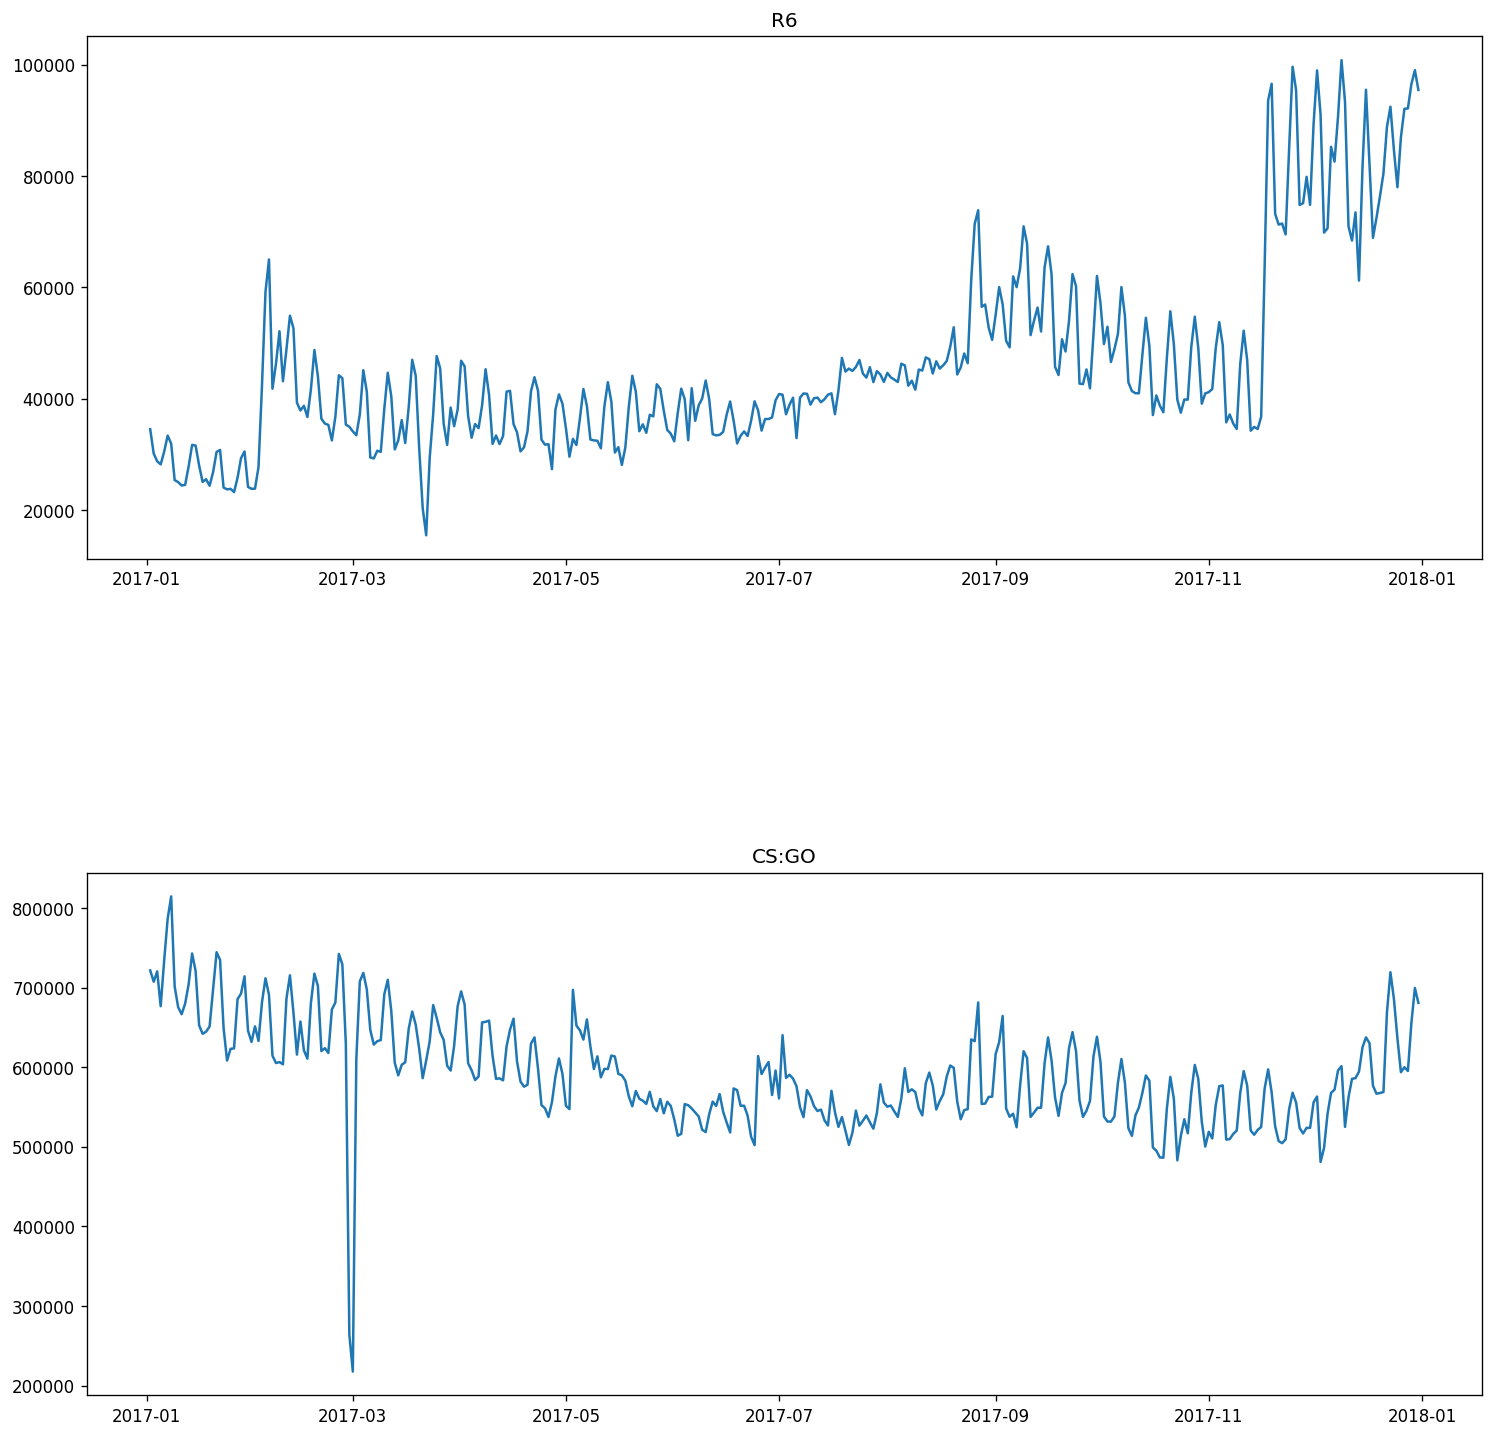

In [0]:
dfsetengahr62017 = df[(df['ds'] > '2017') & (df['ds'] < '2018')]
dfsetengahcs2017 = df2[(df2['ds'] > '2017') & (df2['ds'] < '2018')]
fig,(ax1,ax2) = plt.subplots(2)
fig.subplots_adjust(hspace=.6,wspace= .4)
ax1.plot(dfsetengahr62017['ds'],dfsetengahr62017['y'])
ax1.set(title="R6")
ax2.plot(dfsetengahcs2017['ds'],dfsetengahcs2017['y'])
ax2.set(title="CS:GO")

[Text(0.5, 1.0, 'CS:GO')]

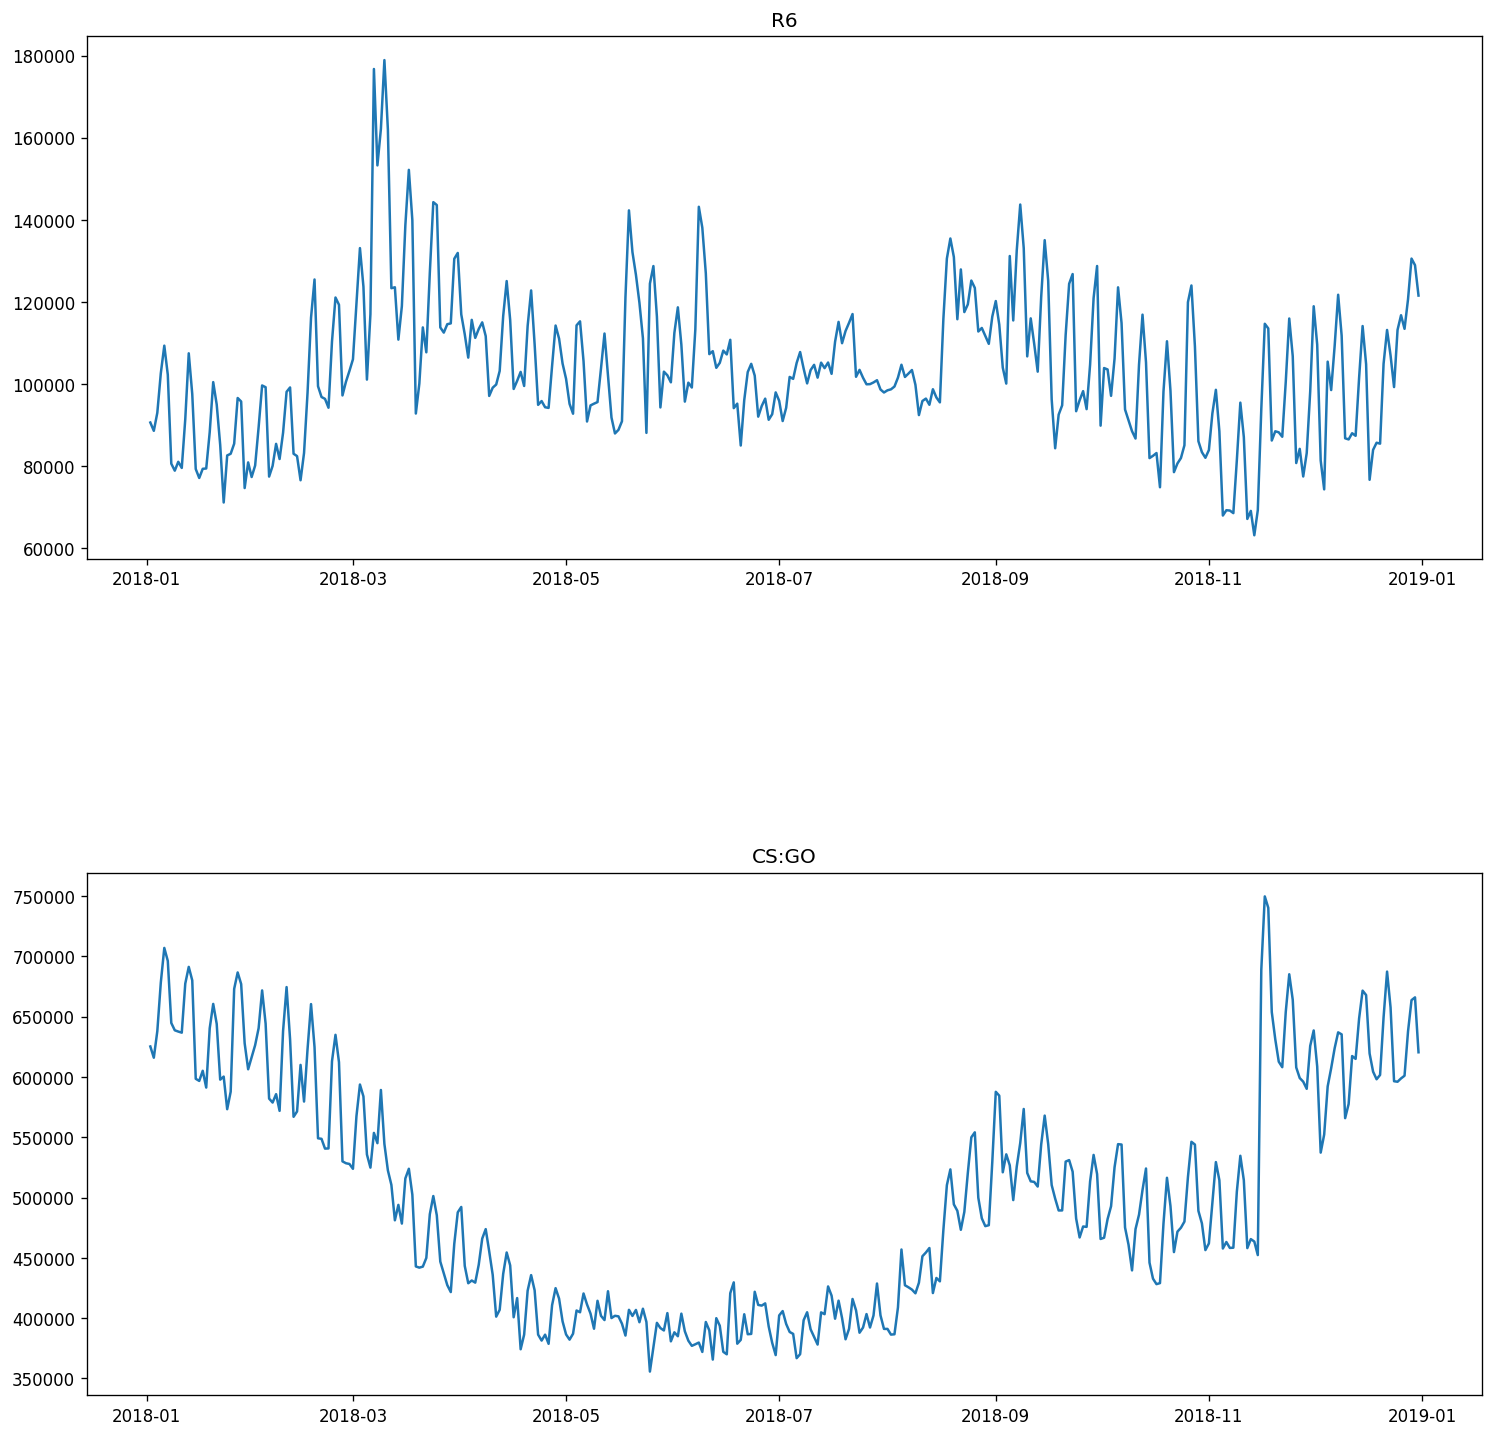

In [0]:
dfsetengahr62018 = df[(df['ds'] > '2018') & (df['ds'] < '2019')]
dfsetengahcs2018 = df2[(df2['ds'] > '2018') & (df2['ds'] < '2019')]
fig,(ax1,ax2) = plt.subplots(2)
fig.subplots_adjust(hspace=.6,wspace= .4)
ax1.plot(dfsetengahr62018['ds'],dfsetengahr62018['y'])
ax2.plot(dfsetengahcs2018['ds'],dfsetengahcs2018['y'])
ax1.set(title="R6")
ax2.set(title="CS:GO")

[Text(0.5, 1.0, 'CS:GO')]

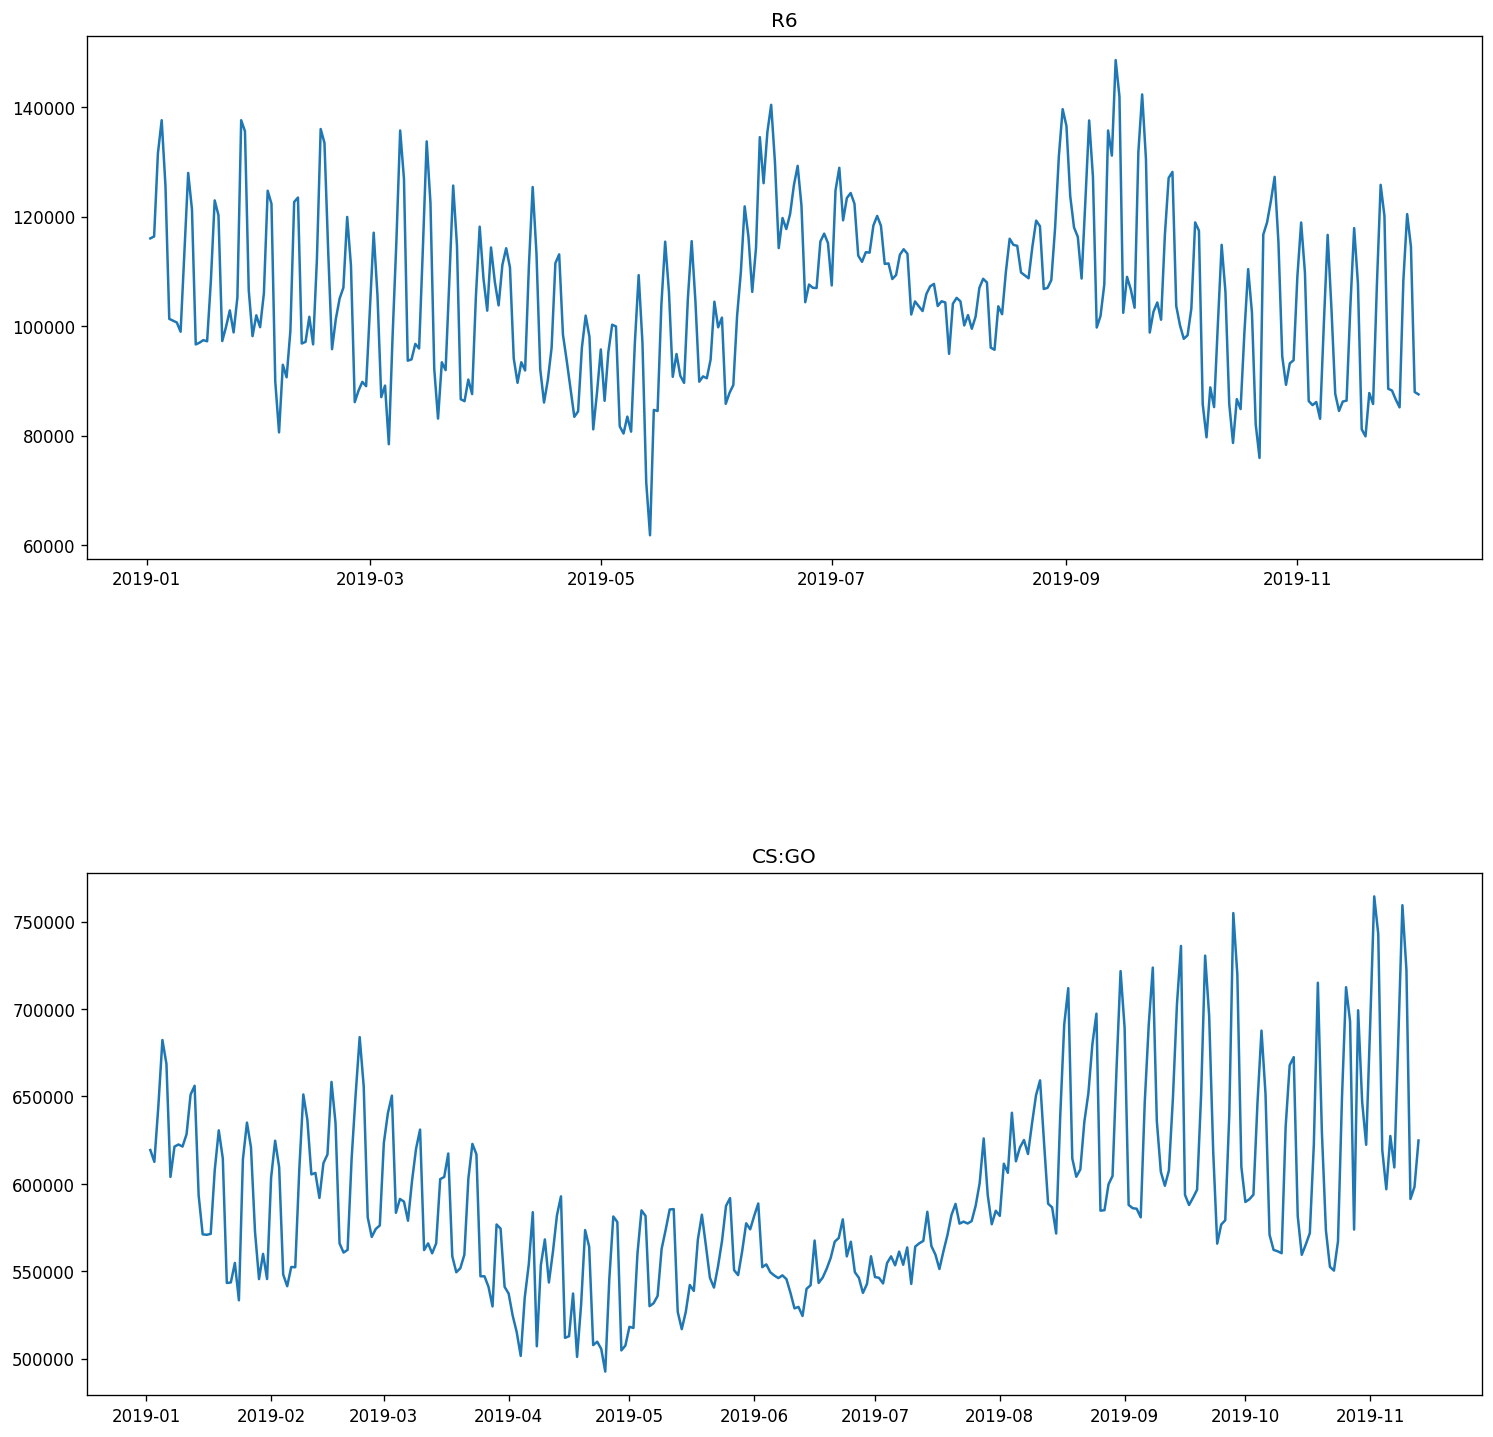

In [0]:
dfsetengahr62019 = df[(df['ds'] > '2019') & (df['ds'] < '2020')]
dfsetengahcs2019 = df2[(df2['ds'] > '2019') & (df2['ds'] < '2020')]
fig,(ax1,ax2) = plt.subplots(2)
fig.subplots_adjust(hspace=.6,wspace= .4)
ax1.plot(dfsetengahr62019['ds'],dfsetengahr62019['y'])
ax2.plot(dfsetengahcs2019['ds'],dfsetengahcs2019['y'])
ax1.set(title="R6")
ax2.set(title="CS:GO")

In [0]:
summer = pd.DataFrame({
        'holiday': '2 window',
        'ds' :pd.to_datetime(
            ['2017-09-22','2018-09-23','2019-09-22']),
        'lower_window' : -92,
        'upper_window' : 0,       
    })
summersale = pd.DataFrame({
        'holiday': '2 window',
        'ds' :pd.to_datetime(
            ['2017-06-22','2018-06-22','2019-06-22']),
        'lower_window' : 0,
        'upper_window' : 14,       
    })
wintersale = pd.DataFrame({
        'holiday': '2 window',
        'ds' :pd.to_datetime(
            ['2017-12-21','2018-12-21','2019-12-21']),
        'lower_window' : 0,
        'upper_window' : 13,       
    })
holidays = pd.concat((summer, summersale,wintersale))

In [0]:
m = Prophet(holidays=holidays,holidays_prior_scale=20)
p = Prophet(holidays=holidays,holidays_prior_scale=20)
p.add_country_holidays(country_name='US')
m.add_country_holidays(country_name='US')
p = p.fit(df2)
m = m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
m.train_holiday_names

0                        2 window
1                  New Year's Day
2       New Year's Day (Observed)
3     Martin Luther King, Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10        Veterans Day (Observed)
11                   Thanksgiving
12                  Christmas Day
dtype: object

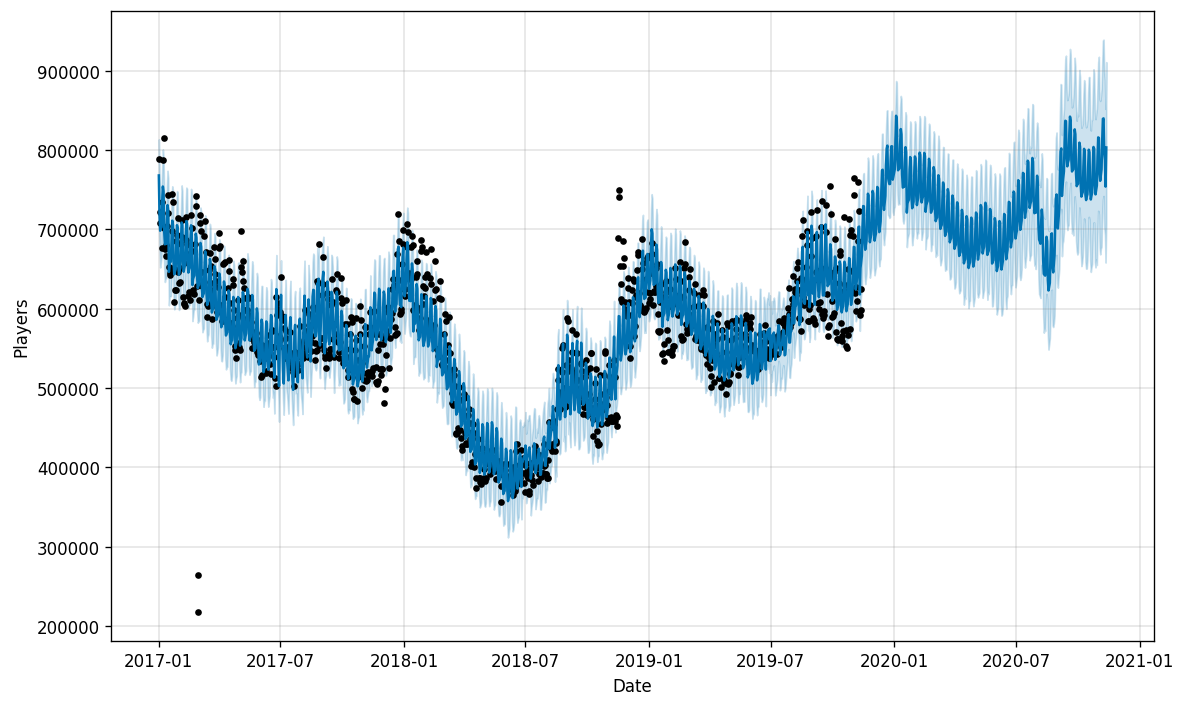

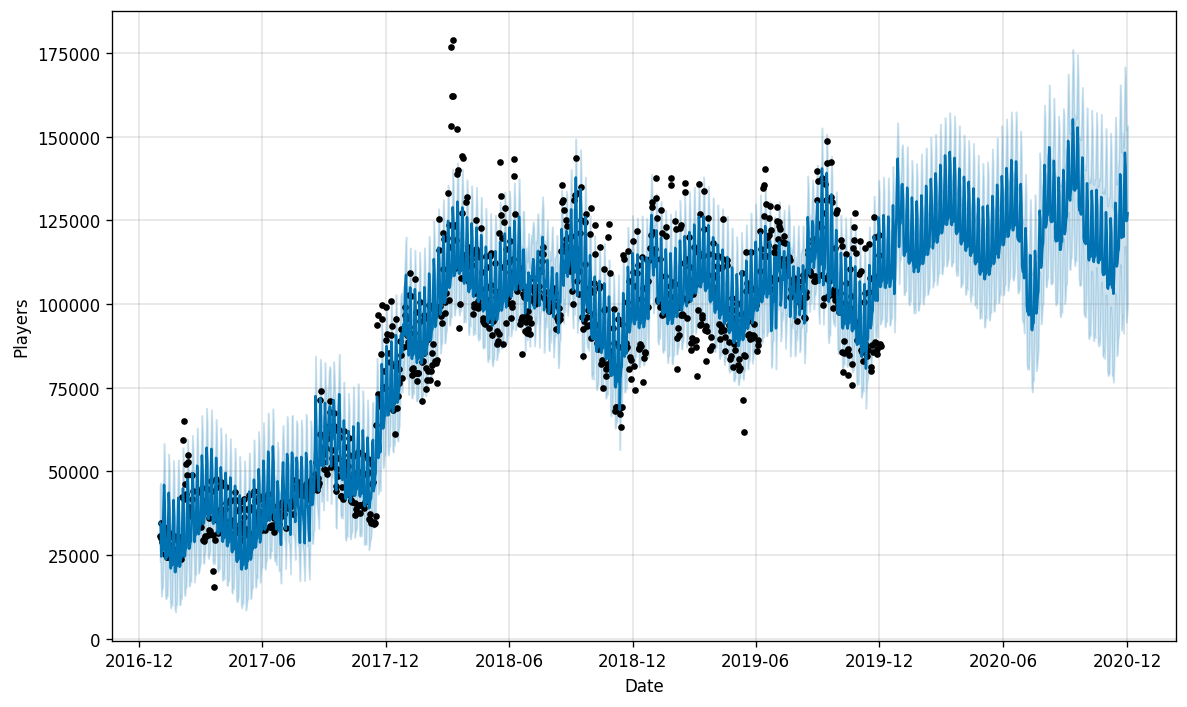

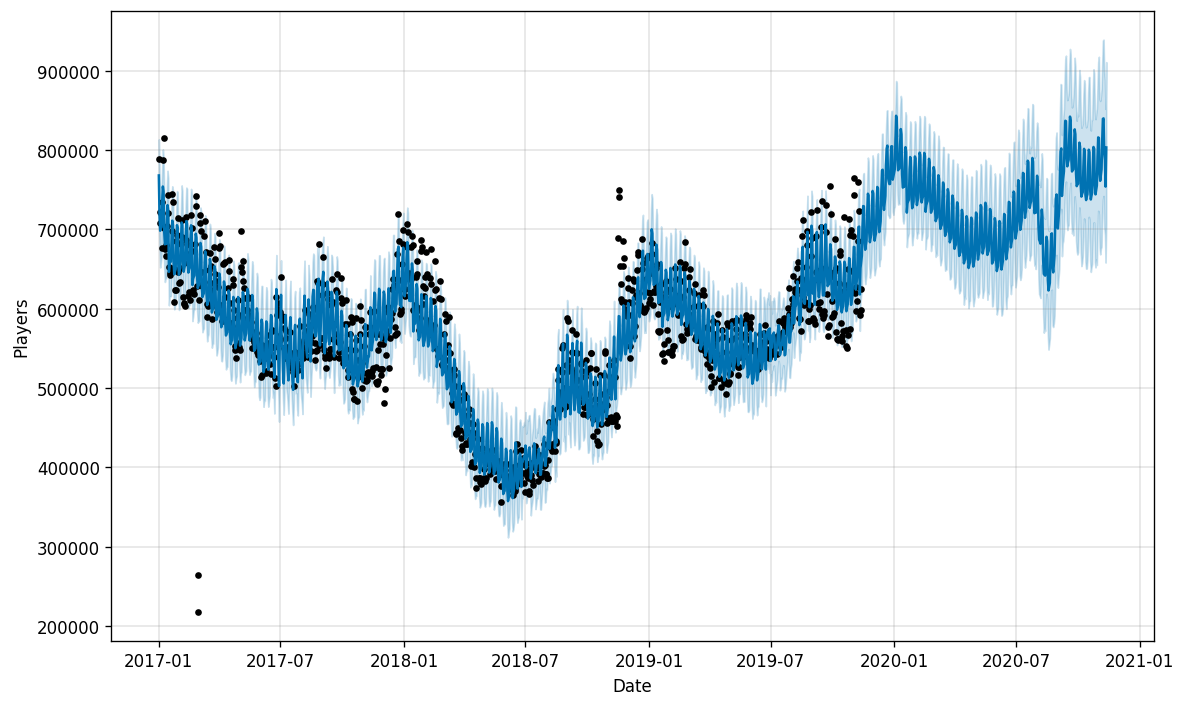

In [0]:
R6futureplayer = m.make_future_dataframe(periods=365)
CSfutureplayer = p.make_future_dataframe(periods=365)
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':120})
forecastr6 = m.predict(R6futureplayer)
forecastcs = p.predict(CSfutureplayer)
m.plot(forecastr6,xlabel='Date',ylabel='Players')
p.plot(forecastcs,xlabel='Date',ylabel='Players')

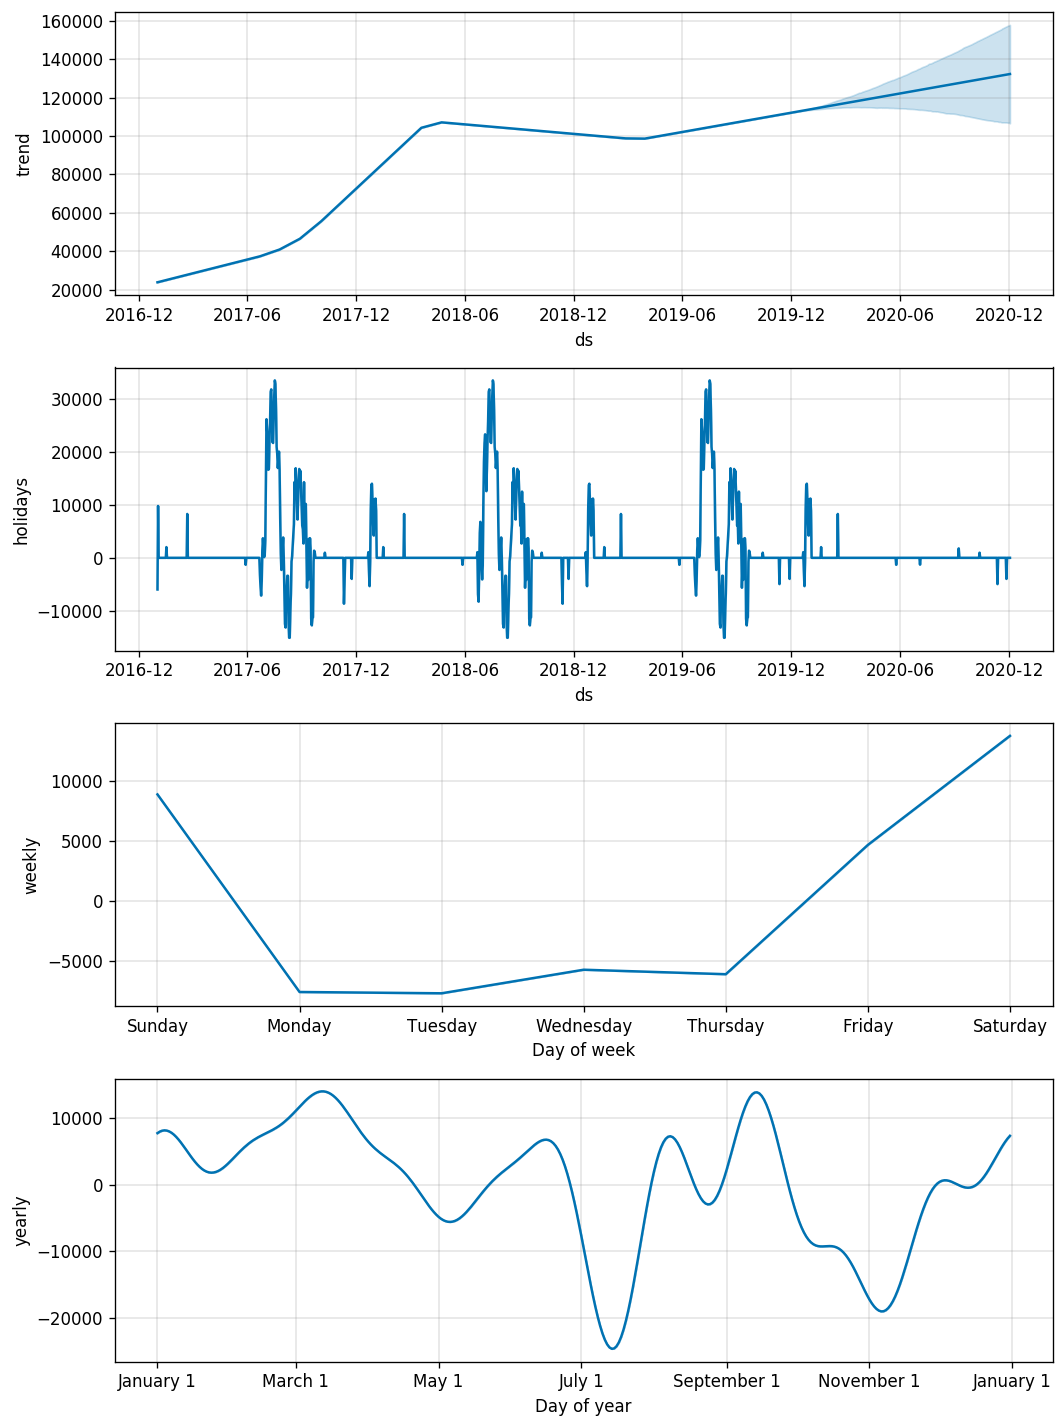

In [0]:
m.plot_components(forecastr6);


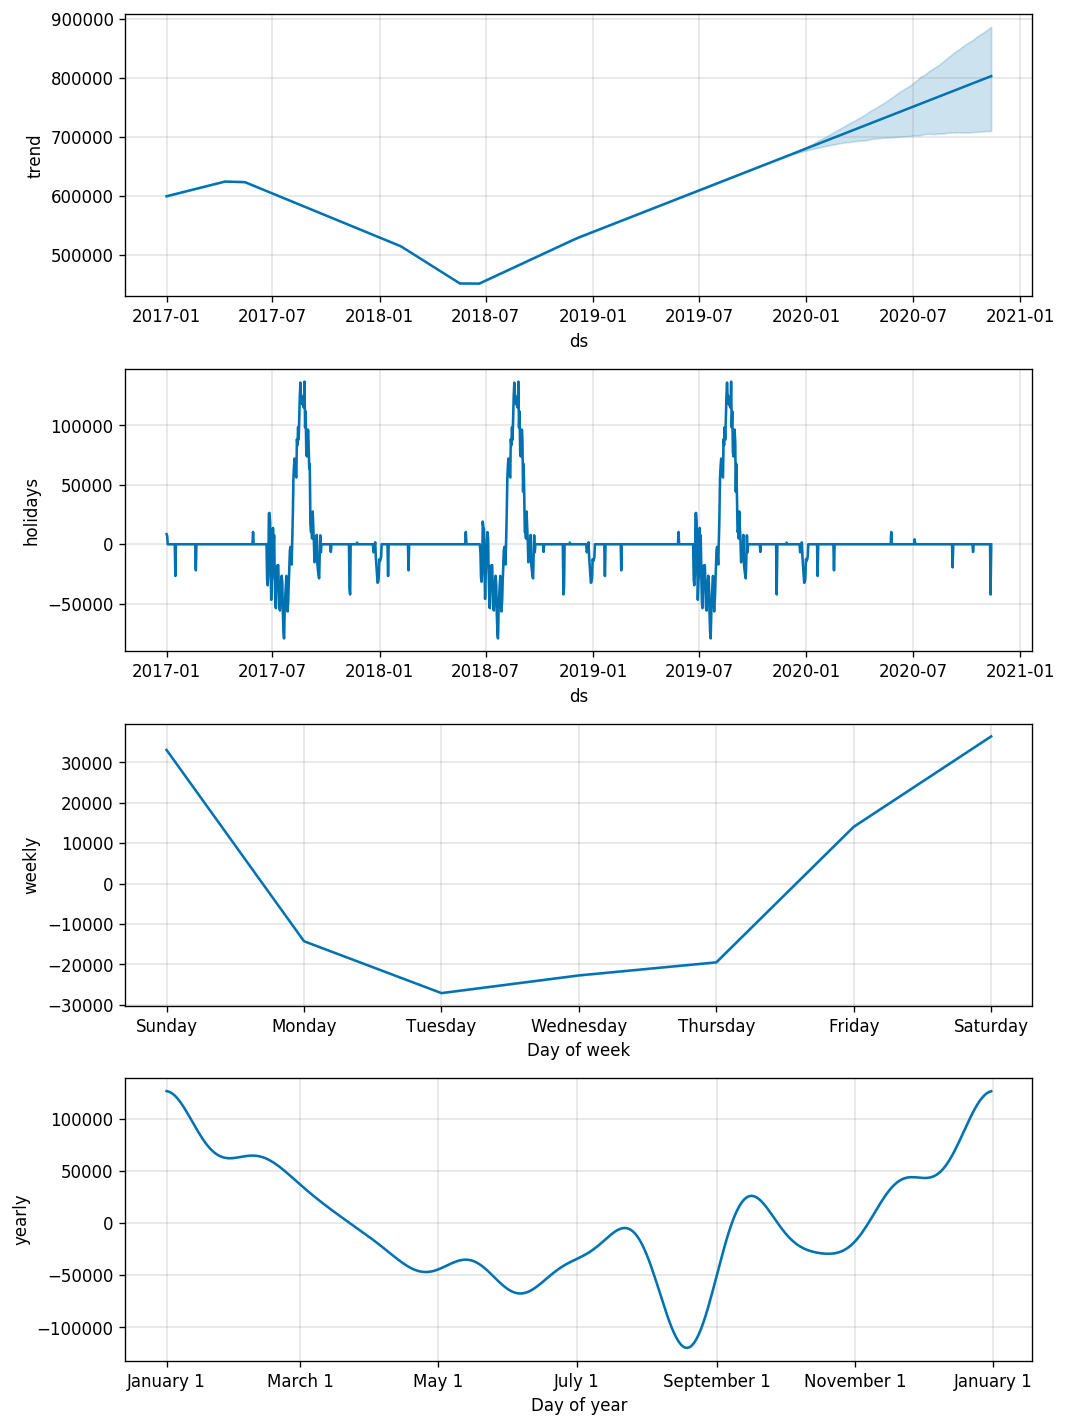

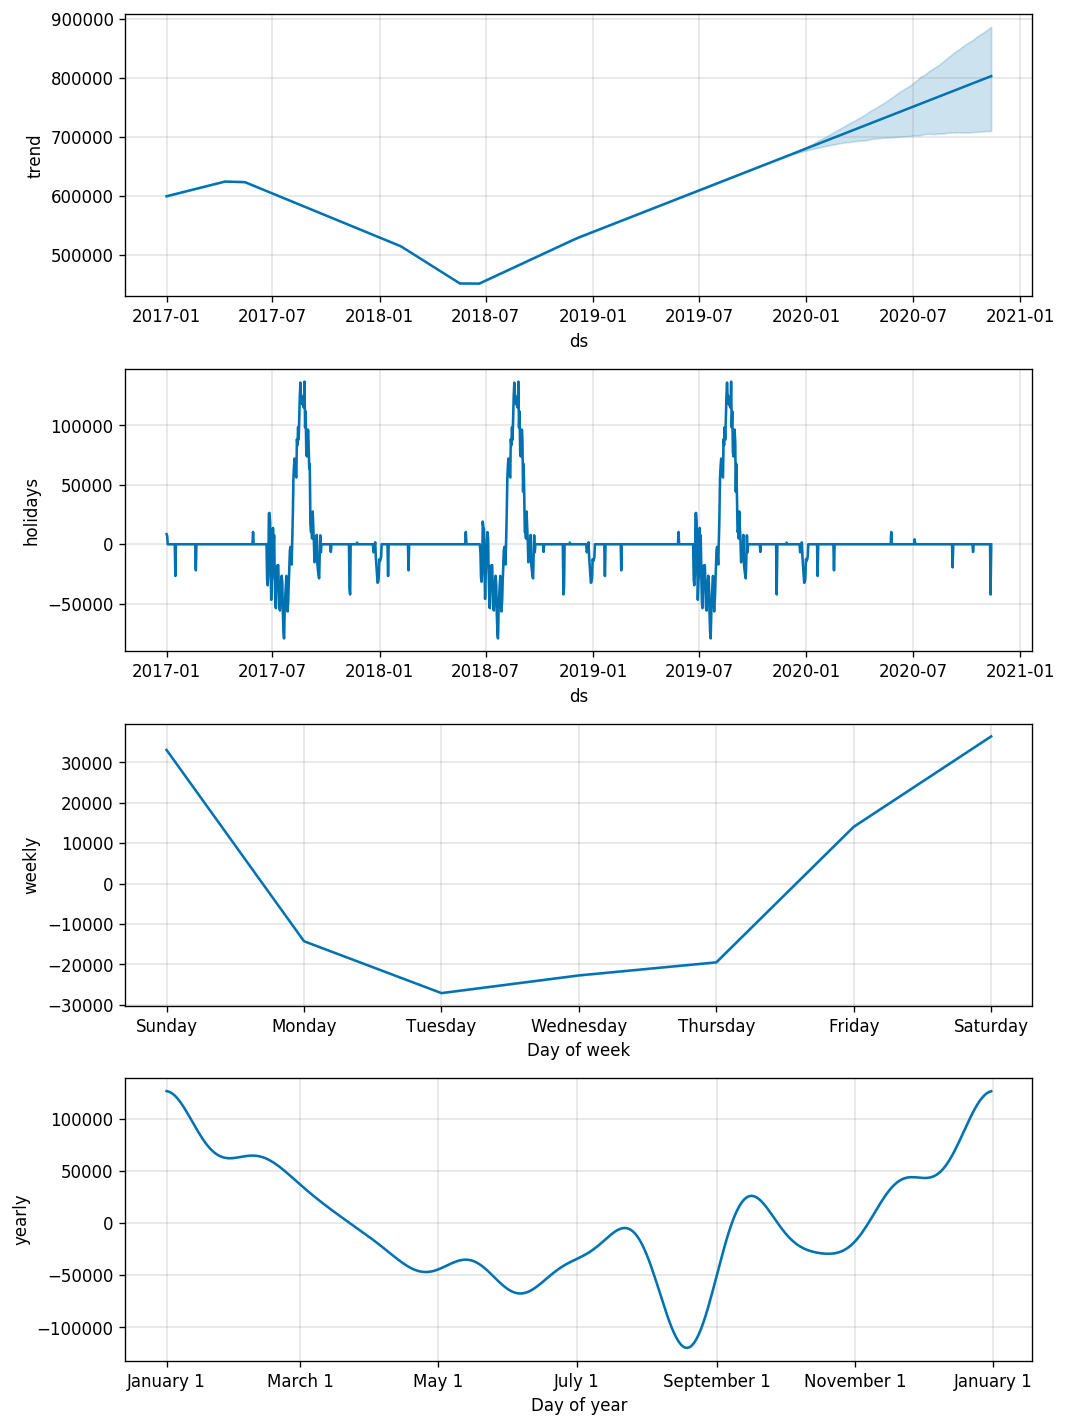

In [0]:
p.plot_components(forecastcs)

Text(0.5, 1.0, 'CS Year 2019')

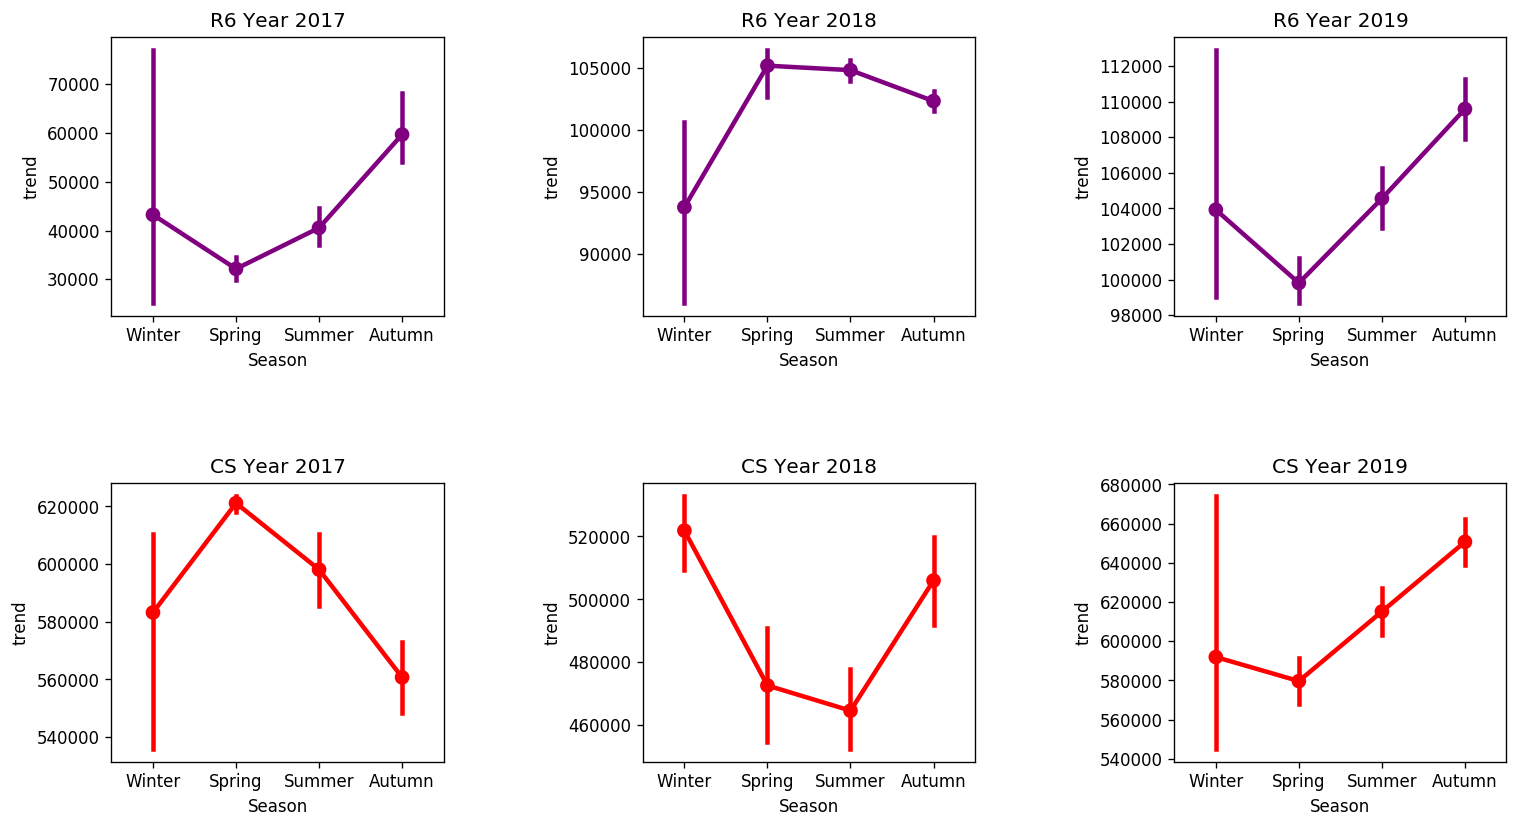

In [0]:
forecast_monthly = forecastr6.resample('M', on='ds').mean()
forecast_monthly = forecast_monthly.reset_index() 


# Extract Year and Month and put it in a column.
forecast_monthly["month_int"] = forecast_monthly['ds'].dt.month
forecast_monthly["year"] = forecast_monthly['ds'].dt.year

forecast_monthly["month"] = np.nan
lst = [forecast_monthly]


for column in lst:
    column.loc[column["month_int"] == 1, "month"] = "January"
    column.loc[column["month_int"] == 2, "month"] = "February"
    column.loc[column["month_int"] == 3, "month"] = "March"
    column.loc[column["month_int"] == 4, "month"] = "April"
    column.loc[column["month_int"] == 5, "month"] = "May"
    column.loc[column["month_int"] == 6, "month"] = "June"
    column.loc[column["month_int"] == 7, "month"] = "July"
    column.loc[column["month_int"] == 8, "month"] = "August"
    column.loc[column["month_int"] == 9, "month"] = "September"
    column.loc[column["month_int"] == 10, "month"] = "October"
    column.loc[column["month_int"] == 11, "month"] = "November"
    column.loc[column["month_int"] == 12, "month"] = "December"
    
    
forecast_monthly['season'] = np.nan
lst2 = [forecast_monthly]

for column in lst2:
    column.loc[(column['month_int'] > 2) & (column['month_int'] <= 5), 'Season'] = 'Spring'
    column.loc[(column['month_int'] > 5) & (column['month_int'] <= 8), 'Season'] = 'Summer'
    column.loc[(column['month_int'] > 8) & (column['month_int'] <= 11), 'Season'] = 'Autumn'
    column.loc[column['month_int'] <= 2, 'Season'] = 'Winter'
    column.loc[column['month_int'] == 12, 'Season'] = 'Winter'
    
    
forecast_monthlycs = forecastcs.resample('M', on='ds').mean()
forecast_monthlycs = forecast_monthlycs.reset_index() 


# Extract Year and Month and put it in a column.
forecast_monthlycs["month_int"] = forecast_monthlycs['ds'].dt.month
forecast_monthlycs["year"] = forecast_monthlycs['ds'].dt.year

forecast_monthlycs["month"] = np.nan
kedua = [forecast_monthlycs]


for column in kedua:
    column.loc[column["month_int"] == 1, "month"] = "January"
    column.loc[column["month_int"] == 2, "month"] = "February"
    column.loc[column["month_int"] == 3, "month"] = "March"
    column.loc[column["month_int"] == 4, "month"] = "April"
    column.loc[column["month_int"] == 5, "month"] = "May"
    column.loc[column["month_int"] == 6, "month"] = "June"
    column.loc[column["month_int"] == 7, "month"] = "July"
    column.loc[column["month_int"] == 8, "month"] = "August"
    column.loc[column["month_int"] == 9, "month"] = "September"
    column.loc[column["month_int"] == 10, "month"] = "October"
    column.loc[column["month_int"] == 11, "month"] = "November"
    column.loc[column["month_int"] == 12, "month"] = "Decacember"
    
    
forecast_monthlycs['season'] = np.nan
keduadua = [forecast_monthlycs]

for column in keduadua:
    column.loc[(column['month_int'] > 2) & (column['month_int'] <= 5), 'Season'] = 'Spring'
    column.loc[(column['month_int'] > 5) & (column['month_int'] <= 8), 'Season'] = 'Summer'
    column.loc[(column['month_int'] > 8) & (column['month_int'] <= 11), 'Season'] = 'Autumn'
    column.loc[column['month_int'] <= 2, 'Season'] = 'Winter'
    column.loc[column['month_int'] == 12, 'Season'] = 'Winter'
    
    
    

# Let's Create Seasonality Columns (Barplots that descripe the average trend per Season for each year)
# Create different axes by Year

df_2019 = forecast_monthly.loc[(forecast_monthly["year"] == 2019)]
df_2017 = forecast_monthly.loc[(forecast_monthly["year"] == 2017)]
df_2018 = forecast_monthly.loc[(forecast_monthly["year"] == 2018)]

dfcs_2019 = forecast_monthlycs.loc[(forecast_monthlycs["year"] == 2019)]
dfcs_2017 = forecast_monthlycs.loc[(forecast_monthlycs["year"] == 2017)]
dfcs_2018 = forecast_monthlycs.loc[(forecast_monthlycs["year"] == 2018)]


f, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,8))
f.subplots_adjust(hspace=.6)
f.subplots_adjust(wspace=.6)


# Year 2016
sns.pointplot(x="Season", y="trend",
                    data=df_2019, ax=ax3, color="purple")

# Year 2017
sns.pointplot(x="Season", y="trend",
                    data=df_2017, ax=ax1, color="purple")

# Year 2018
sns.pointplot(x="Season", y="trend",
                    data=df_2018, ax=ax2, color="purple")
# CS Year 2016
sns.pointplot(x="Season", y="trend",
                    data=dfcs_2019, ax=ax6, color="red")

# CS Year 2017
sns.pointplot(x="Season", y="trend",
                    data=dfcs_2017, ax=ax4, color="red")

# CS Year 2018
sns.pointplot(x="Season", y="trend",
                    data=dfcs_2018, ax=ax5, color="red")


ax1.set_title("R6 Year 2017")
ax2.set_title("R6 Year 2018")
ax3.set_title("R6 Year 2019")

ax4.set_title("CS Year 2017")
ax5.set_title("CS Year 2018")
ax6.set_title("CS Year 2019")